In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
from sklearn import datasets

In [103]:
iris = datasets.load_iris()

In [108]:
X = iris.data

In [110]:
y = iris.target

In [112]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [113]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=40)

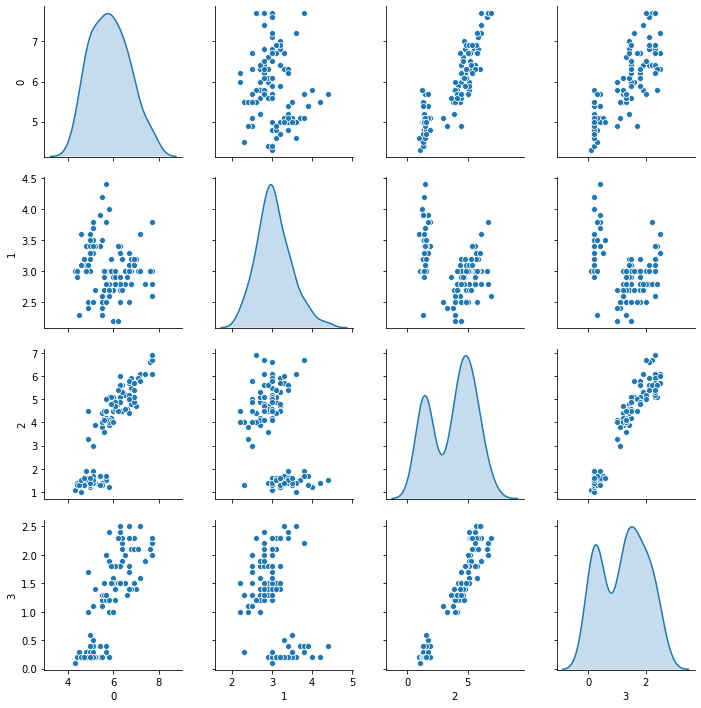

In [118]:
sns.pairplot(pd.DataFrame(X_train), diag_kind='kde')

In [123]:
df = pd.DataFrame(X_train)

In [126]:
df.columns = iris.feature_names

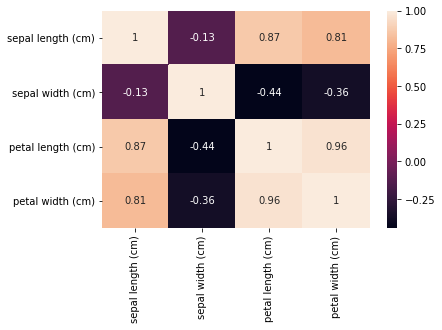

In [129]:
sns.heatmap(df.corr(),annot=True)

In [130]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.131185,0.869251,0.814940
sepal width (cm),-0.131185,1.000000,-0.442040,-0.364953
petal length (cm),0.869251,-0.442040,1.000000,0.961670
petal width (cm),0.814940,-0.364953,0.961670,1.000000


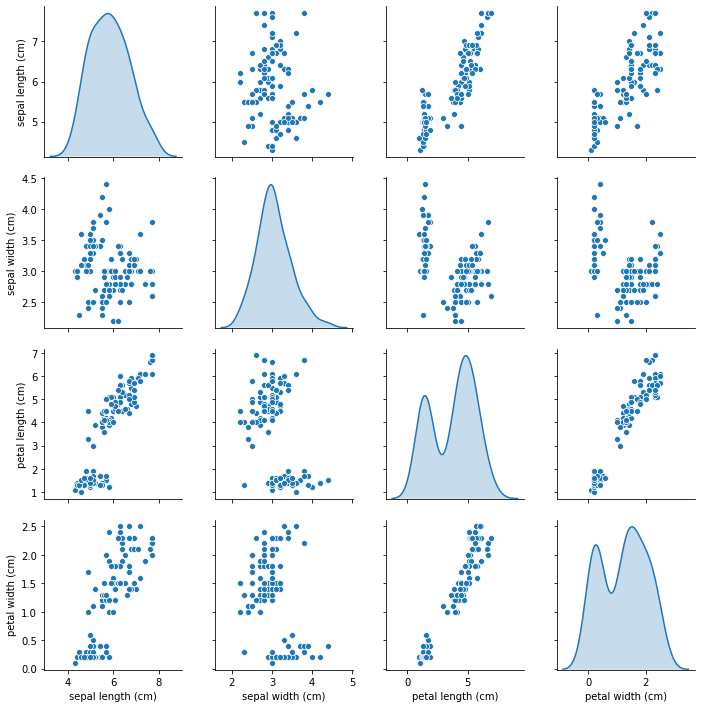

In [131]:
sns.pairplot(df, diag_kind='kde')

In [133]:
# Lets try first without PCA and without standarsdization
model = DecisionTreeClassifier(max_depth=2, random_state=2)

In [134]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

In [135]:
from sklearn.metrics import accuracy_score

In [137]:
predict_labels = model.predict(X_train)

In [140]:
accuracy_score(y_train,predict_labels)

0.9619047619047619

In [141]:
predict_test = model.predict(X_test)

In [142]:
accuracy_score(y_test,predict_test)

0.9111111111111111

In [143]:
model.score(X_test,y_test)

0.9111111111111111

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [145]:
X_train_normal = sc.fit_transform(X_train)

In [146]:
X_test_normal = sc.fit(X_test)

In [147]:
model1 = DecisionTreeClassifier(max_depth=2, random_state=3)

In [149]:
model1.fit(X_train_normal, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3, splitter='best')

In [154]:
X_test_normal_1 = sc.transform(X_test)

In [155]:
predict_labels_norm = model1.predict(X_test_normal_1)

In [156]:
model1.score(X_test_normal_1, y_test)

0.8888888888888888

In [157]:
accuracy_score(y_test, predict_labels_norm)

0.8888888888888888

In [165]:
from sklearn.decomposition import PCA

In [166]:
pca = PCA(n_components=3)

In [167]:
pca.fit(X_train_normal)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [169]:
x_pca = pca.transform(X_train_normal)

In [174]:
type(x_pca)

numpy.ndarray

In [170]:
x_pca.shape


(105, 3)

In [171]:
pca.components_

array([[ 0.51989343, -0.27580051,  0.58020091,  0.56303801],
       [ 0.37753558,  0.92223035,  0.02201403,  0.08045776],
       [-0.7207146 ,  0.23616234,  0.1404333 ,  0.63645605]])

In [172]:
pca.explained_variance_

array([2.9503453, 0.9125966, 0.1554251])

In [173]:
pca.explained_variance_ratio_

array([0.73056169, 0.2259763 , 0.03848621])